In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 

In [2]:
from lazypredict.Supervised import LazyRegressor


In [3]:
# Importing the dataset
dataset  = pd.read_csv("D:\climate-ds.csv")

In [4]:
# Cheking the null value 
print(dataset.isnull().sum())

# Show a head of data 
dataset.head()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
hg/ha_yield                      0
dtype: int64


,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,0,Albania,Maize,1990,1485,121.00,16.37,36613
1,1,Albania,Potatoes,1990,1485,121.00,16.37,66667
2,2,Albania,"Rice, paddy",1990,1485,121.00,16.37,23333
3,3,Albania,Sorghum,1990,1485,121.00,16.37,12500
4,4,Albania,Soybeans,1990,1485,121.00,16.37,7000


In [5]:
# delete first coulm 
dataset = dataset.drop('Unnamed: 0',axis=1)
# turn the string to digit
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.iloc[:,0] = le.fit_transform(dataset.iloc[:,0])
dataset.iloc[:,1] = le.fit_transform(dataset.iloc[:,1])



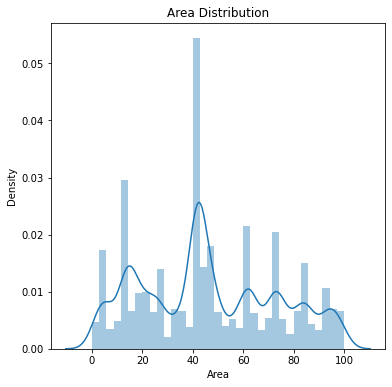

In [20]:
# Plot feature (Area)
plt.figure(figsize=(6,6))
sns.distplot(dataset['Area'])
plt.title('Area Distribution')
plt.show()

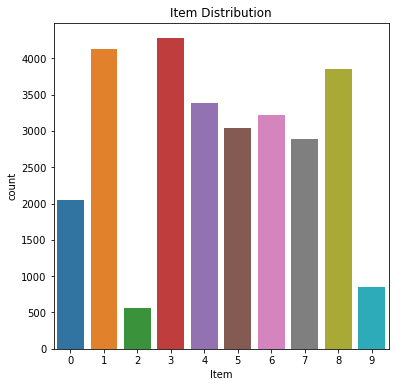

In [6]:
# Plot feature (Item)
plt.figure(figsize=(6,6))
sns.countplot(x='Item', data=dataset)
plt.title('Item Distribution')
plt.show() 

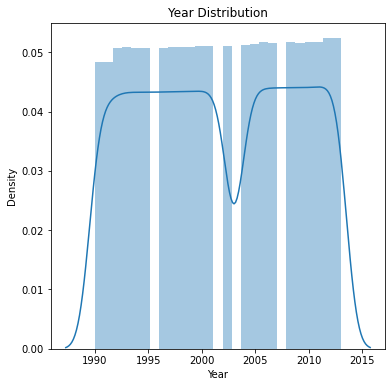

In [9]:
# Plot feature (Year)
plt.figure(figsize=(6,6))
sns.distplot(dataset['Year'])
plt.title('Year Distribution')
plt.show()

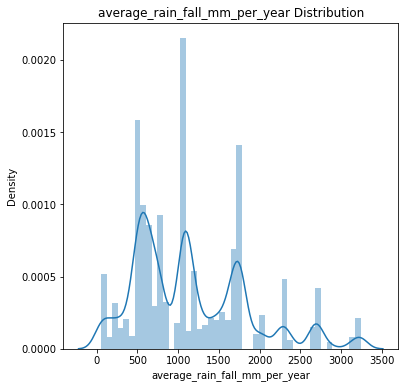

In [10]:
# Plot feature (average_rain_fall_mm_per_year)
plt.figure(figsize=(6,6))
sns.distplot(dataset['average_rain_fall_mm_per_year'])
plt.title('average_rain_fall_mm_per_year Distribution')
plt.show()

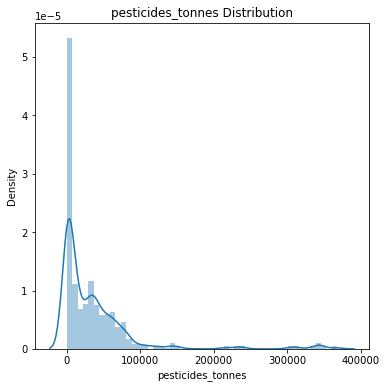

In [11]:
# Plot feature (pesticides_tonnes)
plt.figure(figsize=(6,6))
sns.distplot(dataset['pesticides_tonnes'])
plt.title('pesticides_tonnes Distribution')
plt.show()

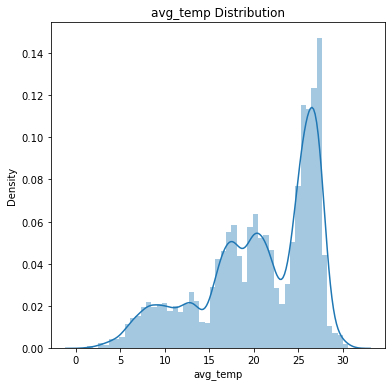

In [12]:
# Plot feature (avg_temp)
plt.figure(figsize=(6,6))
sns.distplot(dataset['avg_temp'])
plt.title('avg_temp Distribution')
plt.show()

In [15]:
# Make X and Y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# Show a head of data 
dataset.head() 


,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,0,1,1990,1485,121.00,16.37,36613
1,0,3,1990,1485,121.00,16.37,66667
2,0,4,1990,1485,121.00,16.37,23333
3,0,5,1990,1485,121.00,16.37,12500
4,0,6,1990,1485,121.00,16.37,7000


In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # take an object from StandardScaler 
X_train = sc.fit_transform(X_train) # convert X_train 
X_test = sc.transform(X_test) # convert X_test 

In [18]:
# bulding model 
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 24%|████████████████████                                                              | 10/41 [00:04<00:17,  1.78it/s]

GaussianProcessRegressor model failed to execute
Unable to allocate 3.80 GiB for an array with shape (22593, 22593) and data type float64


 44%|████████████████████████████████████                                              | 18/41 [00:08<00:07,  2.99it/s]

KernelRidge model failed to execute
Unable to allocate 3.80 GiB for an array with shape (22593, 22593) and data type float64


100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [02:10<00:00,  3.17s/it]

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
ExtraTreesRegressor                          0.99       0.99   8622.74   
RandomForestRegressor                        0.99       0.99  10281.48   
BaggingRegressor                             0.98       0.98  11471.30   
DecisionTreeRegressor                        0.98       0.98  12676.50   
XGBRegressor                                 0.98       0.98  13597.53   
ExtraTreeRegressor                           0.97       0.97  14664.33   
LGBMRegressor                                0.96       0.96  17773.32   
HistGradientBoostingRegressor                0.96       0.96  18039.81   
KNeighborsRegressor                          0.92       0.92  24389.85   
GradientBoostingRegressor                    0.82       0.82  36179.71   
AdaBoostRegressor                            0.63       0.64  52216.48   
PoissonRegressor                      